Hello. In this semester project. I will be implementing Face detection using deep learning AI. 
1. For face detection - i will use MTCNN - Multi-Task Cascaded Convolutional Neural Network
reference - 
https://arxiv.org/abs/1604.02878 - first paper published on MTCNN
https://github.com/ipazc/mtcnn - first implementation of MTCNN

The network uses a cascade structure with three networks;first the image is rescaled to a range of different sizes (called an image pyramid), 
	1. then the first model (Proposal Network or P-Net) proposes candidate facial regions,
	2. the second model (Refine Network or R-Net) filters the bounding boxes, and
	3. the third model (Output Network or O-Net) proposes facial landmarks.
    
MTCNN()# using default weights which is 20 pixels and scale_factor of 0.709
detect_faces does the following: 
{'box': [186, 71, 87, 115], 
'confidence': 0.9994562268257141,
'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}

    ‘box‘: Providing the x, y of the bottom left of the bounding box, as well as the width and height of the box.
    ‘confidence‘: The probability confidence of the prediction.
    ‘keypoints‘: Providing a dict with dots for the ‘left_eye‘, ‘right_eye‘, ‘nose‘, ‘mouth_left‘, and ‘mouth_right‘.
    
2. Furthur For Face Analysis i have used the following algorithm:
    a. deepface library by facebook - for more information : https://github.com/serengil/deepface
  

In [7]:
import mtcnn # neural network library
from mtcnn import MTCNN
import cv2
import ipyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from deepface import DeepFace   #facebook
from IPython.display import Image, display


How MTCNN algorithm works? 


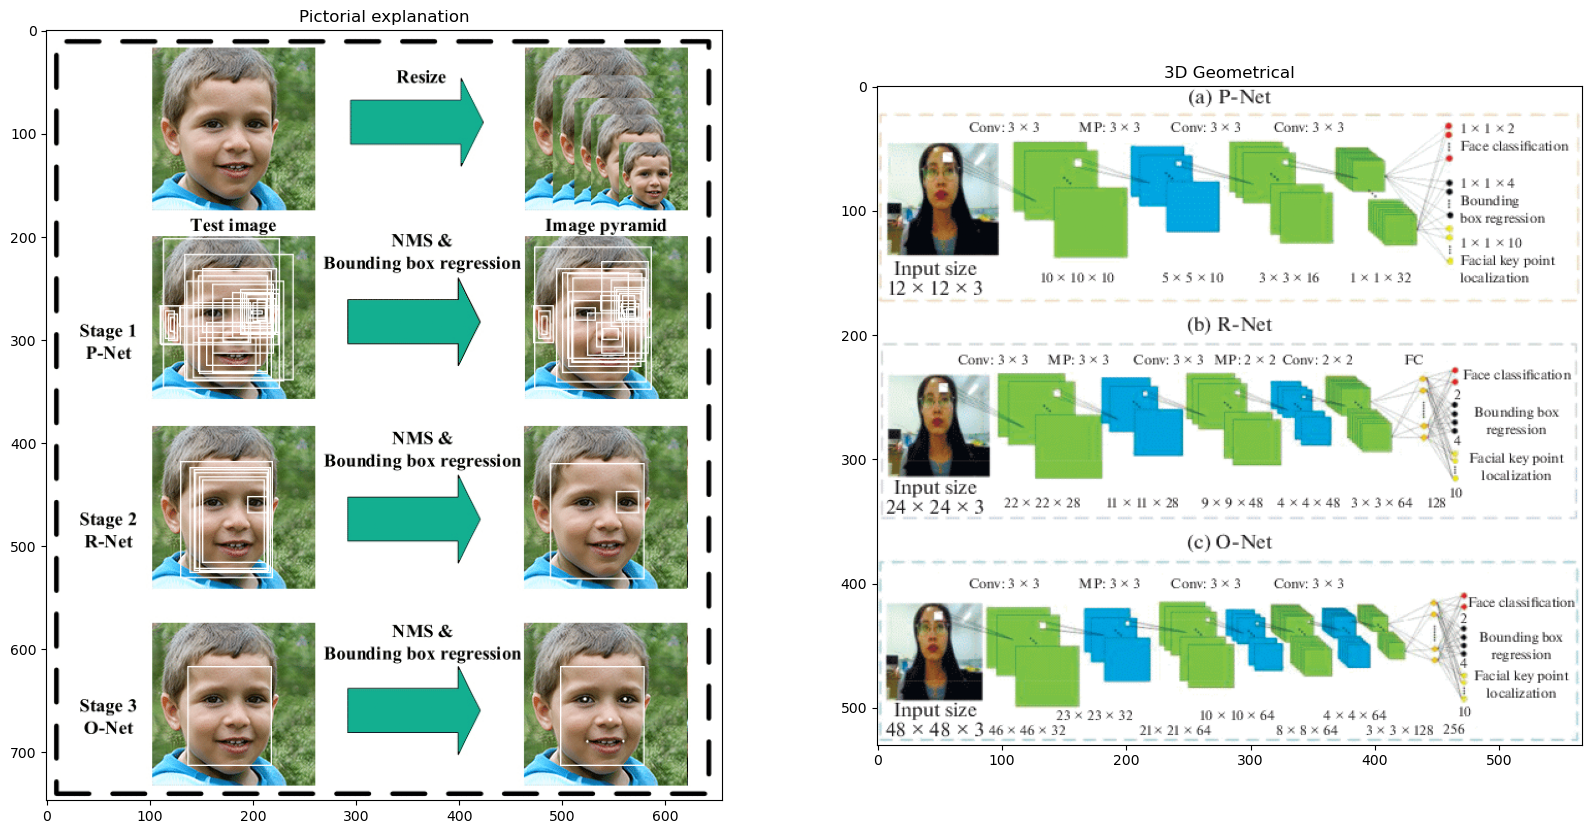

In [12]:
# How MTCNN algorithm works?
img1 = mpimg.imread('Pictures/mtcnn1.png')
img2 = mpimg.imread('Pictures/mtcnn2.png')

fig, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax1.imshow(img1)
ax1.set_title("Pictorial explanation")
ax2.imshow(img2)
ax2.set_title("3D Geometrical")
print("How MTCNN algorithm works? ")
plt.show()

Pictures present in picture directory


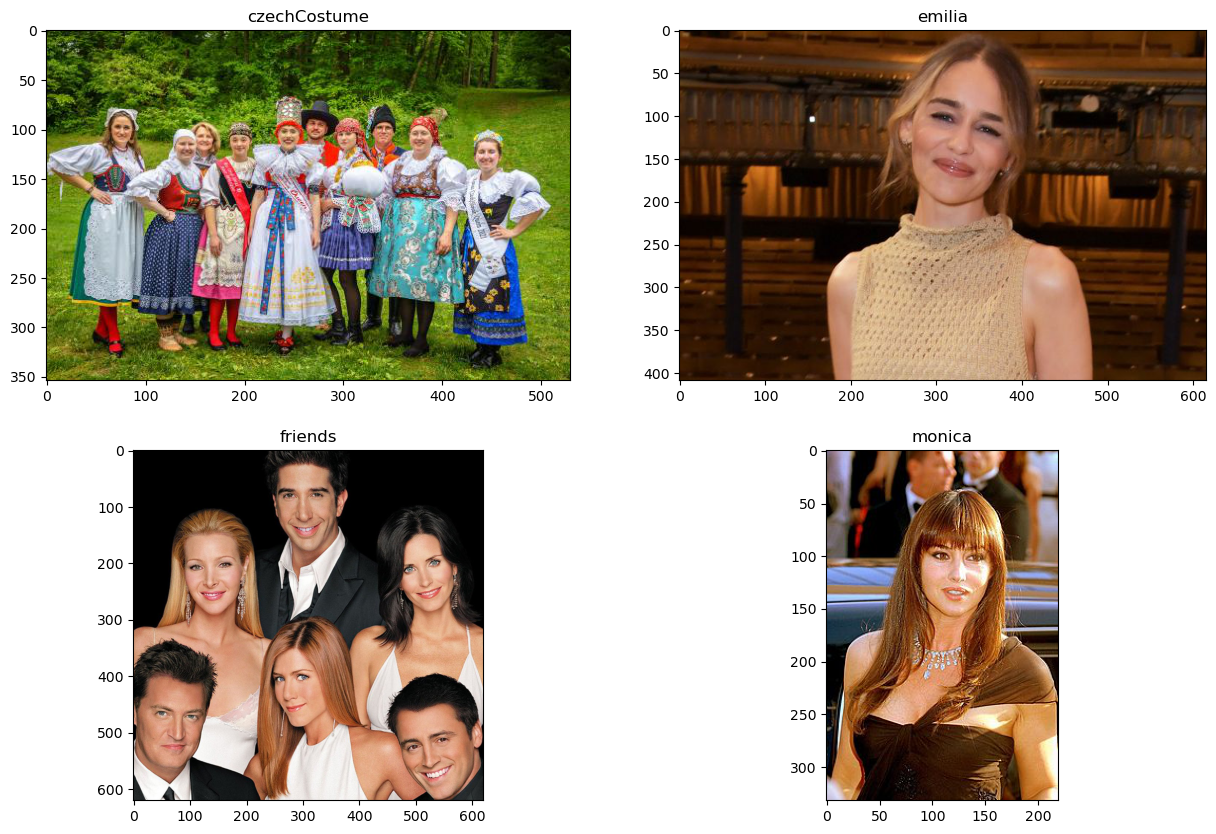

In [3]:
# Read images

img1_path = 'Pictures/czechCostume.jpg'
img2_path = 'Pictures/emilia.jpg'
img3_path = 'Pictures/friends.jpg'
img4_path = 'Pictures/monica.jpg'

img1 = mpimg.imread(img1_path)
img2 = mpimg.imread(img2_path)
img3 = mpimg.imread(img3_path)
img4 = mpimg.imread(img4_path)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax1.imshow(img1)
ax1.set_title("czechCostume")
ax2.imshow(img2)
ax2.set_title("emilia")
ax3.imshow(img3)
ax3.set_title("friends")
ax4.imshow(img4)
ax4.set_title("monica")


print("Pictures present in picture directory")
plt.show()

2/2 [==============================] - 0s 8ms/step

 What would you like to do?
1.Detect faces in a group picture with mcnn = press 1 
2.Extract all individual face in a group picture = press 2 
3.Analyse a face for age, gender, race and emotions information = press 3 

1


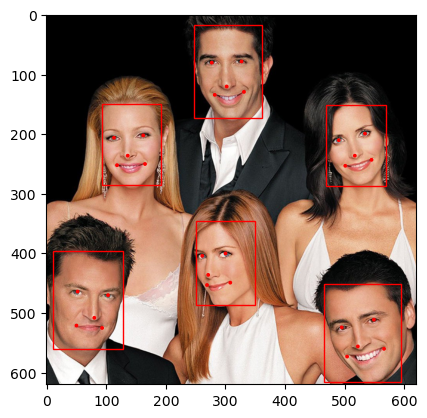


 What would you like to do?
1.Detect faces in a group picture with mcnn = press 1 
2.Extract all individual face in a group picture = press 2 
3.Analyse a face for age, gender, race and emotions information = press 3 

2


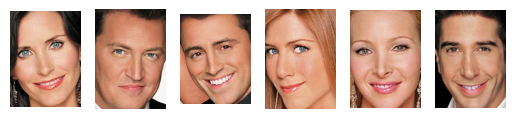


 What would you like to do?
1.Detect faces in a group picture with mcnn = press 1 
2.Extract all individual face in a group picture = press 2 
3.Analyse a face for age, gender, race and emotions information = press 3 

5


In [10]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN


def detect_faces_in_picture(filename, result_list):
    data = pyplot.imread(filename)
    pyplot.imshow(data)
    ax = pyplot.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
        for key, value in result['keypoints'].items():
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    pyplot.show()

    
def extract_unique_faces(filename, result_list):
    data = pyplot.imread(filename)
    for i in range(len(result_list)):# plot each face as a subplot
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        pyplot.subplot(1, len(result_list), i+1)# define subplot
        pyplot.axis('off')
        pyplot.imshow(data[y1:y2, x1:x2])# plot face
    pyplot.show()

filename = img3_path
pixels = pyplot.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)


def extact_face_information():
    print("Select image for more information" "\n Emilia = press 1" "\n Monica = press 2")
    choice = input()
    if choice == '1':
        emilia = img2_path
        img = cv2.imread(emilia)        
        obj = DeepFace.analyze(img_path = emilia, actions = ['age', 'gender', 'race', 'emotion'])
        display(Image(filename=emilia))
    elif choice == '2':
        monica = img4_path
        img = cv2.imread(monica)
        obj = DeepFace.analyze(img_path = monica, actions = ['age', 'gender', 'race', 'emotion'])
        display(Image(filename=monica))
    else:
        print("select valid picture number")
    print("using deepface:", "\n Age:",obj["age"]," Yrs \n","Race:",obj["dominant_race"],"\n","Emotion:", obj["dominant_emotion"],"\n","Gender:", obj["gender"])
    


#main entry point of the code
if __name__ == "__main__":
    while True:
        print("\n What would you like to do?" "\n1.Detect faces in a group picture with mcnn = press 1 " "\n2.Extract all individual face in a group picture = press 2 " "\n3.Analyse a face for age, gender, race and emotions information = press 3 \n")
        choice = input()
        if choice == '1':   
            detect_faces_in_picture(filename, faces)
        elif choice == '2':
            extract_unique_faces(filename, faces)
        elif choice == '3':
            extact_face_information()
        else:
            break
